In [1]:
# importing all libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression                      
from sklearn.model_selection import train_test_split                   

from sklearn.model_selection import KFold                              
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor                    
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor                     

from sklearn.preprocessing import StandardScaler, MinMaxScaler         

from sklearn.neighbors import KNeighborsRegressor                     
from sklearn.svm import SVR                                        

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error                    

import warnings
warnings.filterwarnings('ignore')

In [2]:
# TASK 1
df=pd.read_csv('kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()           

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df1=df.drop(['date','id','sqft_lot15','sqft_living15','lat','long','yr_renovated'],axis=1)
print(df1.shape)
df1.head()

(21613, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074


In [5]:
df1.corr()['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
zipcode         -0.053203
Name: price, dtype: float64

In [6]:
# TASK 2
results, names = list(), list()

x = df1.iloc[:,1:]
y = df1.iloc[:,0:1]

scaled=StandardScaler().fit(x)
scaled_train=scaled.transform(x)
  
x_train, x_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2, random_state=2)

reg=LinearRegression()
reg.fit(x_train,y_train)
predict=reg.predict(x_test)
print(predict)

[[ 671520.41042293]
 [1425836.13127497]
 [ 333170.42393524]
 ...
 [ 604731.85546224]
 [ 160807.74693459]
 [ 422411.4062297 ]]


In [7]:
print('RMSE : ',np.sqrt(mean_squared_error(y_test,predict)))

RMSE :  213865.31843792886


In [8]:
print('R - square : ',reg.score(x_test,y_test))

R - square :  0.6723804566620468


In [9]:
# TASK 3
model = RandomForestRegressor()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
n_scores = cross_val_score(model ,x, y,scoring='r2', cv=cv, n_jobs=-1, error_score = 'raise')

results.append(n_scores)
names.append('rf')

np.mean(results)

0.8177679142348868

In [10]:
# TASK 4
model = AdaBoostRegressor()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
n_scores = cross_val_score(model , x, y,scoring='r2', cv=cv, n_jobs=-1, error_score = 'raise')

results.append(n_scores)
names.append('ada')

np.mean(results)

0.5039877357051881

In [11]:
# TASK 5
def stacking():
    level0 = list()
    level0.append(('rf',RandomForestRegressor()))
    level0.append(('ada',AdaBoostRegressor()))
    level0.append(('svm',SVR()))
    
    level1 = LinearRegression()
    model5 = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model5

In [12]:
model = stacking()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
n_scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('stacking')

In [13]:
names

['rf', 'ada', 'stacking']

In [14]:
results

[array([0.81075365, 0.80654284, 0.77413354, 0.8334602 , 0.82058143,
        0.83546739, 0.81381875, 0.85503031, 0.81096757, 0.8261855 ,
        0.79413189, 0.81770144, 0.75188233, 0.81726787, 0.79332004,
        0.84987674, 0.82176644, 0.84410843, 0.83910365, 0.84626579,
        0.80213611, 0.81323268, 0.73685632, 0.84277309, 0.7941937 ,
        0.83326741, 0.82520274, 0.83796029, 0.83194829, 0.85310101]),
 array([ 1.57013443e-01,  9.72737309e-02,  3.94451477e-04,  9.81992295e-02,
         2.56484420e-01,  3.55971634e-01,  2.01751769e-01,  2.54361153e-01,
        -1.22456832e-01,  4.95791822e-01, -1.19899173e-01,  1.65153786e-01,
         9.83425375e-02,  2.73115779e-01,  2.39912297e-01,  2.99678699e-01,
         3.16449645e-01, -6.71281234e-02, -9.59886676e-02,  5.57944594e-01,
         2.80964707e-01,  2.35809243e-01,  1.27685278e-01,  6.95812703e-02,
         2.58932518e-01,  4.31895748e-01,  2.40001004e-01,  1.44730468e-01,
         1.72102504e-02,  4.37050034e-01]),
 array([0.8051

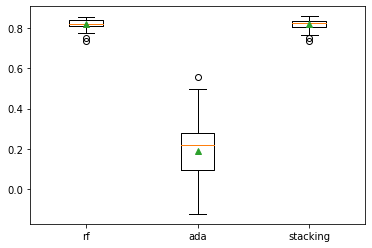

In [15]:
# TASK 6
plt.boxplot(results, labels=names, showmeans=True)
plt.show()